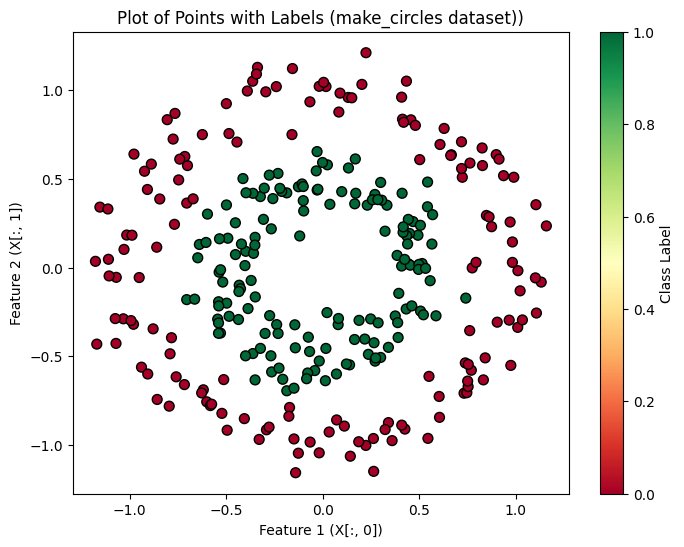

In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

#create circles
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

#plot points w/ their labels
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (X[:, 0])')
plt.ylabel('Feature 2 (X[:, 1])')
plt.title('Plot of Points with Labels (make_circles dataset))')
plt.colorbar(label='Class Label')
plt.show()


In [5]:
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

# function to update and display the plot
def update_plot(hidden_layer_size):
    #generate synthetic data (circles)
    X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

    #create a multi-layer perceptron classifyer
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                       activation='relu', max_iter=3000, random_state=1)
    #fit classifyer to data
    clf.fit(X,y)

    #create grid of points for new training data
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 0].max() + 0.1, 100)

    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    #predict class labels for grid points
    Z = clf.predict(grid_points)

    #reshape into 100x100 array
    Z = Z.reshape(X_plane.shape)

    #predict class labels for original points
    y_pred = clf.predict(X)

    #plot the decision boundary
    plt.contour(X_plane, Y_plane, Z, levels=[-0.5,0.5,1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

    #plot original points with their predicted labels
    class_0 = y_pred==0
    class_1 = y_pred==1

    plt.scatter(X[class_0,0], X[class_0,1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(X[class_1,0], X[class_1,1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 1')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size = {hidden_layer_size})')
    plt.legend()
    plt.show()

#create slider for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size')

#create interactive widget
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)
display(interactive_plot)  

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…